# Reading directory

In [1]:
import os
import glob
import numpy as np


path = "./"

midi_paths = glob.glob(path + "/Dataset/**/*.mid" , recursive = True)
#midi_files


In [2]:
len(midi_paths)

18167

In [3]:
midi_files = midi_paths[0:20]

# Reading midi files

In [4]:
import pypianoroll
import random

In [5]:
%matplotlib notebook

### Compressed audios

In [6]:
# file = midi_files[125] #"chorus_symbol_key.mid"

def readMidi(file):
    pianotrack = pypianoroll.read(file)
    
    track_compressed = []
    for tracks in pianotrack:
        count=0
        tracks = tracks.binarize()
        tracks.pianoroll = np.multiply(tracks.pianoroll, 80)
        for time_stamp in tracks:
            if count % 6 ==0:
                track_compressed.append(time_stamp)
            count += 1
    track_arr = np.array(track_compressed)
    compressed=pypianoroll.StandardTrack(name='melody', program=0, is_drum=False, pianoroll=track_arr)
    return compressed
#     compressedMulti=pypianoroll.Multitrack(name=None, resolution=4, tracks=[compressed])

# Model Traning

In [7]:
pitchs = 128
in_notes = 8 # number of last notes
out_notes = 1

### Creating model

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#Importing ANN
generater = Sequential()

generater.add(keras.Input(shape=(pitchs*in_notes,)))
# generater.add(Dense(units = pitchs*in_notes/2, activation="sigmoid", kernel_initializer = 'uniform') )
generater.add(Dense(units = pitchs*out_notes, activation=keras.activations.softmax, kernel_initializer = 'uniform') )

generater.compile(optimizer ='adam',loss='categorical_crossentropy', metrics=[keras.metrics.CategoricalCrossentropy()])
# generater.compile(optimizer ='adam',loss='categorical_crossentropy', metrics=['accuracy'])
generater.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               131200    
                                                                 
Total params: 131,200
Trainable params: 131,200
Non-trainable params: 0
_________________________________________________________________


### helper function 

In [7]:
def makeData(notes):
    y = notes[-1]
    X = notes[0:8]
    X = np.reshape(X, (pitchs*in_notes))
    return X,y

def changeScale(track):
    semitones = pypianoroll.pitch_range_tuple(track.pianoroll)
#     print(semitones)
    coin_toss = random.randint(0,1)
    if coin_toss:
        diff = semitones[0] - 36
        transpose_by = random.randint(0,abs(diff))
        compressed = track.transpose(transpose_by*-1)
    else :
        diff = 128 - semitones[1]
        transpose_by = random.randint(0,abs(diff))
        compressed = track.transpose(transpose_by*1)
#     compressed.plot()
    return compressed
    pass
    
    
# get index probablistily
def getProbIndx(note_prob):
#     temp_prob = note_prob.reshape((1,128))

    temp = np.random.choice(np.random.choice(note_prob[0], 3, p=note_prob[0], replace=False))

    indx = np.where(note_prob == temp)
    return indx #print(indx[1])

In [10]:
n = 10
midi_files = [midi_paths[i:i + n] for i in range(0, len(midi_paths), n)]
midi_files

[['.//Dataset\\MIDI\\midi\\a\\a-day-to-remember\\downfall-of-us-all\\intro-and-verse_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-day-to-remember\\downfall-of-us-all\\pre-chorus-and-chorus_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-g-cook\\superstar\\chorus_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-g-cook\\superstar\\pre-chorus-and-chorus_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-g-cook\\superstar\\pre-chorus_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-ha\\take-on-me\\chorus_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-ha\\take-on-me\\intro-and-verse_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-ha\\take-on-me\\intro_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-ha\\take-on-me\\verse-and-pre-chorus_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-ha\\the-sun-always-shines-on-tv\\bridge_symbol_key.mid'],
 ['.//Dataset\\MIDI\\midi\\a\\a-ha\\the-sun-always-shines-on-tv\\chorus_symbol_key.mid',
  './/Dataset\\MIDI\\midi\\a\\a-ha\\the-sun-always-shines

###  Training


In [11]:
itr=0
for files in midi_files:
    
    print(itr/len(midi_files)*100, '%')
    itr += 1
    
    for file in files:
        X_train = []
        y_train = []
#         print(file)
        try:
            compressed = readMidi(file)
        except :
#             print("faulty data")
            continue
        compressed = changeScale(compressed)
        compressed = compressed.binarize() 
        compressed = compressed.pianoroll + 0
        for i in range(0, len(compressed)-8):
            X, y  = makeData(compressed[i: i+10])
            X_train.append(X)
            y_train.append(y)
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        try:
            generater.fit(X_train,y_train,epochs=100, use_multiprocessing=True, verbose=0)
        except :
    #             print("faulty data")
            continue

0.0 %
0.0550357732526142 %
0.1100715465052284 %
0.1651073197578426 %
0.2201430930104568 %
0.27517886626307103 %
0.3302146395156852 %
0.3852504127682994 %
0.4402861860209136 %
0.49532195927352773 %
0.5503577325261421 %
0.6053935057787562 %
0.6604292790313704 %
0.7154650522839846 %
0.7705008255365988 %
0.8255365987892129 %
0.8805723720418271 %
0.9356081452944414 %
0.9906439185470555 %
1.0456796917996698 %
1.1007154650522841 %
1.1557512383048982 %
1.2107870115575123 %
1.2658227848101267 %
1.3208585580627408 %
1.3758943313153549 %
1.4309301045679692 %
1.4859658778205835 %
1.5410016510731976 %
1.5960374243258117 %
1.6510731975784259 %
1.7061089708310402 %
1.7611447440836543 %
1.8161805173362684 %
1.8712162905888827 %
1.9262520638414968 %
1.981287837094111 %
2.0363236103467255 %
2.0913593835993396 %
2.1463951568519537 %
2.2014309301045683 %
2.2564667033571824 %
2.3115024766097965 %
2.3665382498624106 %
2.4215740231150247 %
2.476609796367639 %
2.5316455696202533 %
2.5866813428728674 %
2.64171

22.069345074298294 %
22.12438084755091 %
22.179416620803522 %
22.234452394056138 %
22.28948816730875 %
22.344523940561363 %
22.39955971381398 %
22.45459548706659 %
22.509631260319207 %
22.564667033571823 %
22.619702806824435 %
22.67473858007705 %
22.729774353329667 %
22.78481012658228 %
22.83984589983489 %
22.894881673087507 %
22.94991744634012 %
23.004953219592736 %
23.059988992845348 %
23.115024766097964 %
23.17006053935058 %
23.225096312603192 %
23.280132085855808 %
23.33516785910842 %
23.390203632361033 %
23.44523940561365 %
23.50027517886626 %
23.555310952118877 %
23.610346725371492 %
23.665382498624105 %
23.72041827187672 %
23.775454045129337 %
23.83048981838195 %
23.88552559163456 %
23.940561364887177 %
23.99559713813979 %
24.050632911392405 %
24.105668684645018 %
24.160704457897634 %
24.21574023115025 %
24.27077600440286 %
24.325811777655478 %
24.38084755090809 %
24.435883324160702 %
24.490919097413318 %
24.545954870665934 %
24.600990643918546 %
24.656026417171162 %
24.71106219

44.24876169510182 %
44.303797468354425 %
44.358833241607044 %
44.41386901485966 %
44.468904788112276 %
44.52394056136489 %
44.5789763346175 %
44.63401210787011 %
44.689047881122725 %
44.744083654375345 %
44.79911942762796 %
44.85415520088058 %
44.90919097413318 %
44.9642267473858 %
45.019262520638414 %
45.07429829389103 %
45.129334067143645 %
45.18436984039626 %
45.23940561364887 %
45.29444138690148 %
45.3494771601541 %
45.404512933406714 %
45.459548706659334 %
45.51458447991194 %
45.56962025316456 %
45.62465602641717 %
45.67969179966978 %
45.7347275729224 %
45.789763346175015 %
45.84479911942763 %
45.89983489268024 %
45.95487066593286 %
46.00990643918547 %
46.06494221243808 %
46.119977985690696 %
46.175013758943315 %
46.23004953219593 %
46.28508530544854 %
46.34012107870116 %
46.39515685195377 %
46.450192625206384 %
46.505228398458996 %
46.560264171711616 %
46.61529994496423 %
46.67033571821684 %
46.72537149146945 %
46.780407264722065 %
46.835443037974684 %
46.8904788112273 %
46.94551

66.6483214089158 %
66.7033571821684 %
66.75839295542102 %
66.81342872867364 %
66.86846450192625 %
66.92350027517887 %
66.97853604843148 %
67.03357182168409 %
67.08860759493672 %
67.14364336818932 %
67.19867914144194 %
67.25371491469456 %
67.30875068794717 %
67.36378646119978 %
67.41882223445239 %
67.47385800770502 %
67.52889378095762 %
67.58392955421023 %
67.63896532746286 %
67.69400110071547 %
67.74903687396808 %
67.80407264722069 %
67.85910842047332 %
67.91414419372592 %
67.96917996697853 %
68.02421574023116 %
68.07925151348377 %
68.13428728673638 %
68.189323059989 %
68.2443588332416 %
68.29939460649422 %
68.35443037974683 %
68.40946615299946 %
68.46450192625207 %
68.51953769950467 %
68.5745734727573 %
68.6296092460099 %
68.68464501926252 %
68.73968079251513 %
68.79471656576774 %
68.84975233902037 %
68.90478811227297 %
68.9598238855256 %
69.0148596587782 %
69.06989543203082 %
69.12493120528343 %
69.17996697853604 %
69.23500275178867 %
69.29003852504127 %
69.3450742982939 %
69.4001100

89.37809576224545 %
89.43313153549808 %
89.48816730875069 %
89.5432030820033 %
89.59823885525591 %
89.65327462850853 %
89.70831040176115 %
89.76334617501377 %
89.81838194826636 %
89.87341772151899 %
89.9284534947716 %
89.98348926802421 %
90.03852504127683 %
90.09356081452944 %
90.14859658778207 %
90.20363236103466 %
90.25866813428729 %
90.3137039075399 %
90.36873968079252 %
90.42377545404513 %
90.47881122729774 %
90.53384700055037 %
90.58888277380296 %
90.64391854705559 %
90.6989543203082 %
90.75399009356082 %
90.80902586681343 %
90.86406164006604 %
90.91909741331867 %
90.97413318657127 %
91.02916895982388 %
91.0842047330765 %
91.13924050632912 %
91.19427627958173 %
91.24931205283434 %
91.30434782608695 %
91.35938359933957 %
91.41441937259218 %
91.4694551458448 %
91.52449091909742 %
91.57952669235003 %
91.63456246560264 %
91.68959823885525 %
91.74463401210787 %
91.79966978536048 %
91.8547055586131 %
91.90974133186572 %
91.96477710511832 %
92.01981287837094 %
92.07484865162355 %
92.1298

In [26]:
loaded_model = keras.models.load_model("Fully trained.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               131200    
                                                                 
Total params: 131,200
Trainable params: 131,200
Non-trainable params: 0
_________________________________________________________________


### Prediction

In [430]:
import random
# track = compressed[0:8]

seed_notes = random.sample(midi_paths, 1)
# print(seed_notes)
track = readMidi(seed_notes[0])
track = track.binarize() 
track = track.pianoroll + 0
track = track[0:8]
steps = 492
# print(track)

# track[-8:]

seed, temp = makeData(track[-8:])
[[]]
[]

seed = np.reshape(seed, (-1, 1024))
# print(len(seed))
seed

count = 0
for i in range(0, steps):
    seed, temp = makeData(track[-8:])
    seed = np.reshape(seed, (-1, 1024))
    
    note_prob = generater.predict(seed)
#     print(note_prob.shape)
#     print(np.random.choice(note_prob[0], 5, p=note_prob))
    if count%8:
        new_note = np.argmax(note_prob, axis=1)
    else:
#         temp = random.randint(0,4)
#         if temp!=0:
        new_note = getProbIndx(note_prob)
    new_step = np.arange(128)
    new_step = np.zeros_like(new_step, dtype=np.uint8)
    new_step[new_note[-1]] = 1
    track =np.append(track, [new_step], axis=0)
    count += 1
#     track = np.append(new_step, track)
# track[9]

### Writing generated music

In [431]:
def shift(track):
    s = 0
    for x in track:
#         print(x)
        s += np.argmax(note_prob, axis=1)[0]
#     print(s/len(track))
    
    rescale = 66- (s/len(track))
    track.transpose(int(rescale))

In [432]:
track = np.multiply(track, 80)

In [433]:
new_track=pypianoroll.StandardTrack(name='melody', program=0, is_drum=False, pianoroll=track)

<IPython.core.display.Javascript object>


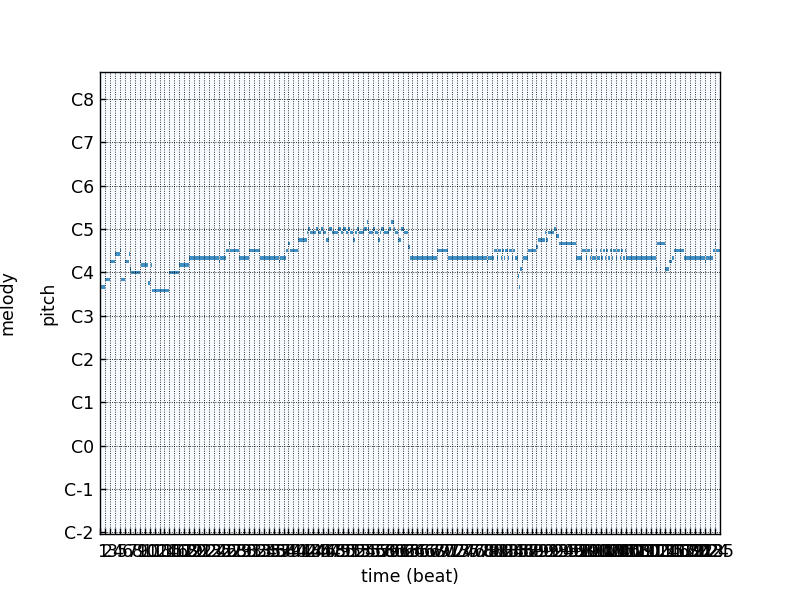

[<AxesSubplot:xlabel='time (beat)', ylabel='melody\n\npitch'>]

In [434]:
newMulti = pypianoroll.Multitrack(name=None, resolution=4, tracks=[new_track])
newMulti.plot()

In [428]:

shift(new_track)

# print(note_prob)


<IPython.core.display.Javascript object>


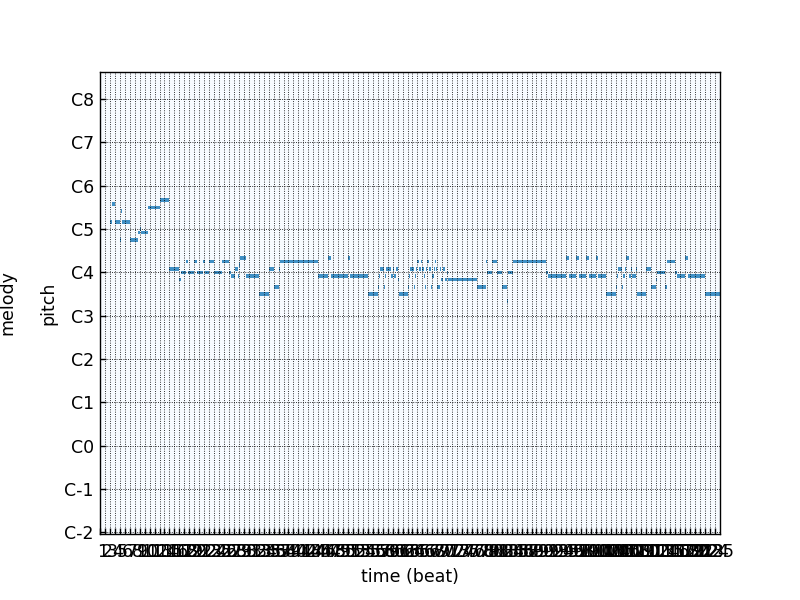

[<AxesSubplot:xlabel='time (beat)', ylabel='melody\n\npitch'>]

In [429]:

newMulti = pypianoroll.Multitrack(name=None, resolution=4, tracks=[new_track])
newMulti.plot()

In [436]:

pypianoroll.write("first_gen.mid", newMulti)

#### trys

<IPython.core.display.Javascript object>


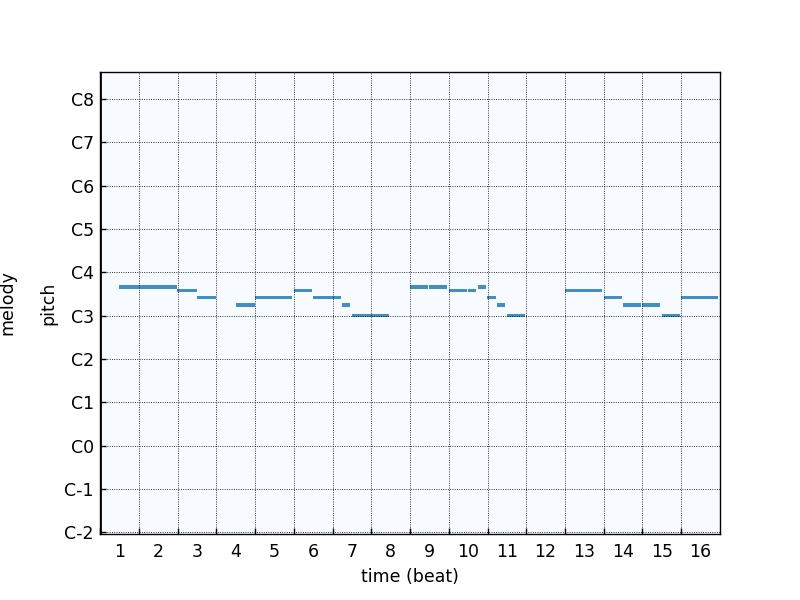

[<AxesSubplot:xlabel='time (beat)', ylabel='melody\n\npitch'>]

In [68]:
file = random.sample(midi_paths, 1)
try:
    compressed = pypianoroll.read(file[0])
except :
#             print("faulty data")
    print("shit")
compressed.plot()
# compressed = changeScale(compressed)
# compressed = compressed.binarize()
# compressed.plot()
# compressed = compressed.pianoroll + 0
